#تأنّى (ta'ana)

##Project Overview

The "Ta'ana" project aims to develop an innovative system for detecting traffic accidents through video analysis. This system will provide accurate, evidence-based information to improve the understanding of the underlying causes of accidents, helping to enhance road safety and implement effective preventive measures.

#Objectives


1. **Accident Detection**: Utilize YOLO technology to identify critical moments in video clips that document accidents, enabling immediate recognition of significant events.

2. **Report Generation**: Apply the RAG model to generate comprehensive reports outlining the causes and circumstances of accidents, helping to understand the contexts surrounding each incident.

3. **Cause Analysis**: By analyzing the extracted information, it will be possible to identify the root causes of accidents, contributing to the development of effective solutions to mitigate them.

4. **Congestion Reduction**: By understanding the underlying causes of accidents, effective strategies can be implemented to improve traffic management and reduce congestion.

5. **Safety Enhancement**: Provide valuable information to relevant authorities, aiding in the improvement of safety and prevention strategies and the development of more effective traffic policies.




# Beneficiaries:


1.   **Government authorities**: Such as traffic management and city municipalities, to improve traffic regulation and reduce accidents.

3.   **Drivers and citizens**: By improving traffic flow and reducing delays in reaching their destinations

4.  **Emergency services:** To reduce response time to accidents and ensure road safety.

5. **Researchers and analysts:** To utilize data in studies focused on improving traffic safety and urban planning.

###1. Install Libraries


In [ ]:
!pip install inference_sdk
!pip install ultralytics
!pip install opencv-python-headless
!pip install langchain langchain_community unstructured sentence_transformers tiktoken chromadb langchain_chroma langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.0/882.0 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import cv2
from inference_sdk import InferenceHTTPClient
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import csv
import time
from datetime import datetime
import csv
from collections import Counter
import pandas as pd
import os
import markdown
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)
import markdown
from langchain.text_splitter import RecursiveCharacterTextSplitter
import json
from langchain_chroma import Chroma
from langchain.chains import RetrievalQA
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


###2. Download Dataset


In [ ]:
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="......"
)

###3. Test the Model


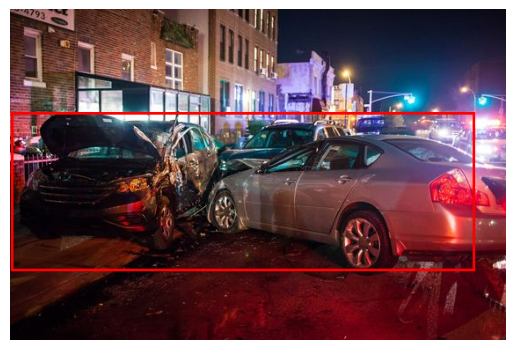

In [ ]:
image_path = "/content/ads.jpg"

import os
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found: {image_path}")


img = cv2.imread(image_path)


if img is None:
    raise ValueError(f"Failed to load image from path: {image_path}")


temp_image_path = "temp_image.jpg"
cv2.imwrite(temp_image_path, img)


results = CLIENT.infer(temp_image_path, model_id="accident-detection-cwbvs/2")


image_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(image_pil)


for prediction in results['predictions']:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    top_left = (x - width / 2, y - height / 2)
    bottom_right = (x + width / 2, y + height / 2)


    draw.rectangle([top_left, bottom_right], outline="red", width=3)


plt.imshow(image_pil)
plt.axis('off')
plt.show()

###4. Analyze the Video


In [ ]:
video_path = '/content/video testing.mp4'
cap = cv2.VideoCapture(video_path)


fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))


try:
    font = ImageFont.truetype("arial.ttf", 30)
except IOError:
    font = ImageFont.load_default()


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break


    image_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


    image_pil.save('temp_frame.jpg')


    result = CLIENT.infer('temp_frame.jpg', model_id="accident-detection-cwbvs/2")


    predictions = result['predictions']


    draw = ImageDraw.Draw(image_pil)

    for prediction in predictions:

        x = prediction['x']
        y = prediction['y']
        width = prediction['width']
        height = prediction['height']
        confidence = prediction['confidence']


        top_left = (x - width / 2, y - height / 2)
        bottom_right = (x + width / 2, y + height / 2)


        draw.rectangle([top_left, bottom_right], outline="red", width=3)


        text = "accident"
        text_bbox = draw.textbbox((0, 0), text, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        text_position = (top_left[0], top_left[1] - text_height - 10)
        text_box_top_left = (text_position[0] - 5, text_position[1] - 5)
        text_box_bottom_right = (text_position[0] + text_width + 5, text_position[1] + text_height + 5)

        draw.rectangle([text_box_top_left, text_box_bottom_right], fill="white")

        draw.text(text_position, text, fill="red", font=font)

    frame_with_boxes = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

    out.write(frame_with_boxes)

cap.release()
out.release()
cv2.destroyAllWindows()

###5.Download the model report

In [ ]:
model = YOLO("yolov8s-world.pt")

model.set_classes(["Traffic-light", "Yallow", "green", "red"])

model.save("custom_yolov8s.pt")

100%|██████████| 25.9M/25.9M [00:00<00:00, 101MB/s]


requirements: Ultralytics requirement ['git+https://github.com/ultralytics/CLIP.git'] not found, attempting AutoUpdate...
  Cloning https://github.com/ultralytics/CLIP.git to /tmp/pip-req-build-9ly9ocoj
  Resolved https://github.com/ultralytics/CLIP.git to commit f8cd7eec0bf1dc35cca8c090e7764b88027c3039
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 4.9 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1382219 sha256=e1c7f610a8cc12dac5a16a460803904f544ab09206c7e881110554327a6c31fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-zml0sw80/wheels/2e/25/92/e26f2a227599930e19a8188891e9600b6dd36721a0f8d6ef40
Successfully built clip

requirements: AutoUpdate success ✅ 6.3s, installed 1 package: ['git+https://github.com/ultralytics/CLIP.git']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 156MiB/s]



image 1/1 /content/Traffic.jpg: 320x640 2 Traffic-lights, 939.1ms
Speed: 9.4ms preprocess, 939.1ms inference, 14.1ms postprocess per image at shape (1, 3, 320, 640)


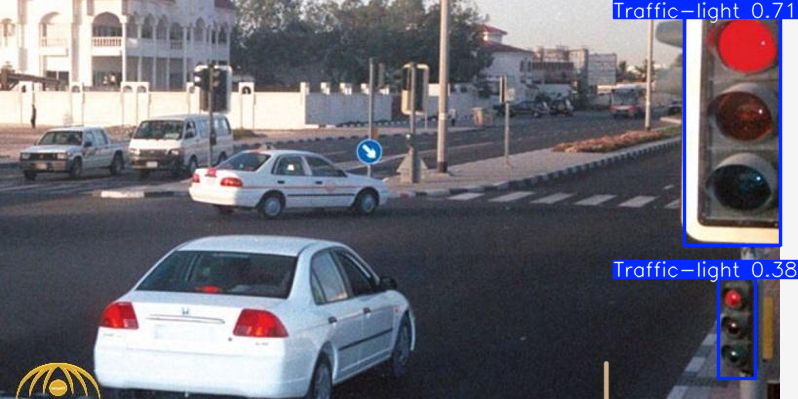

In [ ]:
from ultralytics import YOLO

model = YOLO("custom_yolov8s.pt")

results = model.predict("/content/Traffic.jpg")

results[0].show()

###6.CSV execution



In [ ]:
model = YOLO("custom_yolov8s.pt")

cap = cv2.VideoCapture('/content/output_video.mp4')

fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output3.mp4', fourcc, fps, (1020, 500))

with open('detections.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['Date and Time', 'Class', 'Cause'])

    count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        count += 1
        frame = cv2.resize(frame, (1020, 500))

        results = model.predict(frame)

        current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

        for result in results:
            boxes = result.boxes
            for box in boxes:
                class_id = int(box.cls)

                class_list = ["traffic light"]
                if class_id < len(class_list):
                    c = class_list[class_id]

                    if c == "traffic light":
                        cause = "Skipping a traffic light"

                        writer.writerow([current_datetime, c, cause])

                        x1, y1, x2, y2 = map(int, box.xyxy[0])
                        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                        cv2.putText(frame, f'{c}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

        out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 320x640 1 Traffic-light, 617.7ms
Speed: 2.8ms preprocess, 617.7ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 Traffic-light, 749.9ms
Speed: 4.9ms preprocess, 749.9ms inference, 2.3ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 Traffic-light, 808.6ms
Speed: 5.6ms preprocess, 808.6ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 Traffic-light, 625.8ms
Speed: 3.0ms preprocess, 625.8ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 Traffic-light, 600.1ms
Speed: 3.1ms preprocess, 600.1ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 Traffic-light, 732.0ms
Speed: 3.2ms preprocess, 732.0ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 Traffic-light, 716.8ms
Speed: 3.2ms preprocess, 716.8ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 Traffic-light, 824.3ms
Speed: 3.1ms prepr

###7. Display Report Statistics


In [ ]:
with open('detections.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)

    classes = []
    causes = []


    for row in reader:
        classes.append(row[1])
        causes.append(row[2])

class_counts = Counter(classes)
cause_counts = Counter(causes)

print("إحصائيات التقرير:")
print("\nعدد الكائنات المكتشفة:")
for class_type, count in class_counts.items():
    print(f"{class_type}: {count}")

print("\nأسباب الحوادث المكتشفة:")
for cause, count in cause_counts.items():
    print(f"{cause}: {count}")


إحصائيات التقرير:

عدد الكائنات المكتشفة:
traffic light: 72

أسباب الحوادث المكتشفة:
Skipping a traffic light: 72


###8.RAG
####Loed Dataset

In [ ]:
df = pd.read_csv('/content/detections.csv')
df.head()

,Date and Time,Class,Cause
0,2024-10-07 17:54:08,traffic light,Skipping a traffic light
1,2024-10-07 17:54:09,traffic light,Skipping a traffic light
2,2024-10-07 17:54:10,traffic light,Skipping a traffic light
3,2024-10-07 17:54:11,traffic light,Skipping a traffic light
4,2024-10-07 17:54:11,traffic light,Skipping a traffic light


In [ ]:
df.shape

(72, 3)

In [ ]:
directory = "/content/data"
os.mkdir(directory)

In [ ]:

for i in range(0, df.shape[0]):

    Class = df['Class'].iloc[i]
    Cause = df['Cause'].iloc[i]

    markdown_Cause = f"# {Class}\n\n"
    markdown_Cause += f"{Cause}\n\n"

    with open(f'{directory}/{i}.md', 'w', encoding='utf-8') as file:
        file.write(markdown_Cause)

In [ ]:
markdown_texts = []
for filename in os.listdir(directory):
  if filename.endswith(".md"):
    with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
      markdown_content = file.read()
      html_content = markdown.markdown(markdown_content)
      markdown_texts.append(html_content)

####Chunk the markdown data

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
documents = text_splitter.create_documents(markdown_texts)

In [ ]:
embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
db = Chroma.from_documents(documents, embedding_function, persist_directory="./chroma_db")

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def query_chroma_db(query, db, top_k=5):
    docs = db.similarity_search(query)
    results = [doc.page_content for doc in docs]
    return results

In [ ]:
PROMPT_TEMPLATE = """
أجب على السؤال في اللغه العربيه بناءً على السياق التالي فقط إذا كان يحتوي على المعلومات المطلوبة:
السياق: {context}
السؤال: {question}
إجابتك:
"""

prompt_template = PromptTemplate(
    template=PROMPT_TEMPLATE, input_variables=["context", "question"]
)

In [ ]:
groq_api_key = "...."
llm = ChatGroq(temperature=0, groq_api_key=groq_api_key, model_name="llama3-8b-8192")

In [ ]:
MODEL = LLMChain(llm=llm,
                 prompt=prompt_template,
                 verbose=True)

In [ ]:
def query_rag(query: str):
    similarity_search_results = db.similarity_search_with_score(query, k=4)
    context_text = "\n\n".join([doc.page_content for doc, _score in similarity_search_results])

    rag_response = MODEL.invoke({"context": context_text, "question": query})

    return rag_response

In [ ]:
response = query_rag("The most common cause of the accident")
response



> Entering new LLMChain chain...
Prompt after formatting:

أجب على السؤال في اللغه العربيه بناءً على السياق التالي فقط إذا كان يحتوي على المعلومات المطلوبة:
السياق: <h1>traffic light</h1>
<p>Skipping a traffic light</p>

<h1>traffic light</h1>
<p>Skipping a traffic light</p>

<h1>traffic light</h1>
<p>Skipping a traffic light</p>

<h1>traffic light</h1>
<p>Skipping a traffic light</p>
السؤال: The most common cause of the accident
إجابتك:


> Finished chain.


{'context': '<h1>traffic light</h1>\n<p>Skipping a traffic light</p>\n\n<h1>traffic light</h1>\n<p>Skipping a traffic light</p>\n\n<h1>traffic light</h1>\n<p>Skipping a traffic light</p>\n\n<h1>traffic light</h1>\n<p>Skipping a traffic light</p>',
 'question': 'The most common cause of the accident',
 'text': 'السبب الأكثر شيوعاً لحدث الحادث هو تجاوز الإشارة المرورية (Skipping a traffic light).'}

##Conclusion

In this project, we leveraged artificial intelligence and computer vision technologies in an innovative way to effectively detect and analyze traffic accidents. By using advanced algorithms such as YOLOv8, we were able to identify incidents like collisions in real-time. These technologies provide accurate and immediate information to the relevant authorities, helping to speed up emergency response and reduce traffic congestion, ultimately improving traffic management and reducing road risks.